<a href="https://colab.research.google.com/github/Ash-Stat/An-Si-Hyun/blob/data/%EB%8D%B0%EB%A7%88%EC%8B%A4%EC%8A%B5%EA%B3%BC%EC%A0%9C1%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv('./train_data.csv')
data=data.drop(['id'],axis=1)
data

,target1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170
0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,-0.443,-0.338,0.416,-2.177,-0.326,0.340,1.174,-0.245,-1.070,-0.336,-0.502,0.403,-0.605,-0.280,-1.618,0.878,-0.272,0.870,2.171,-0.214,0.477,-2.092,0.835,0.621,-2.810,1.029,-0.736,0.582,-0.079,0.493,1.359,-0.177,...,0.388,-1.032,-0.841,0.288,-0.230,-2.714,-0.473,0.476,-1.352,-0.922,0.329,-0.558,0.787,-1.043,-0.130,0.517,2.445,0.847,-0.636,-0.324,0.753,0.058,-1.461,-0.820,-0.076,1.127,-0.496,1.020,0.279,0.262,-0.277,-0.166,-0.089,-1.696,-0.598,-0.710,-0.431,0.355,0.966,-1.134
1,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,0.557,1.202,0.542,0.424,-1.572,-0.968,-1.483,0.564,0.047,-0.324,-1.490,0.179,-0.524,0.250,2.462,0.029,-1.399,-2.370,-1.505,-1.294,0.106,-0.145,0.235,-1.045,1.335,1.254,-0.811,1.812,0.181,-0.020,1.125,0.279,...,0.675,-1.015,-0.304,-1.301,-0.614,-1.176,0.117,0.075,-0.088,1.888,-0.119,0.434,0.135,1.779,0.554,-0.622,-1.214,0.389,0.136,1.035,0.101,-1.592,-0.552,1.145,0.587,1.117,-0.645,1.022,0.639,0.968,0.176,-1.132,0.119,0.428,-1.739,0.758,-1.445,0.916,-0.366,-1.132
2,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,-0.624,-0.017,-0.665,1.905,0.376,-1.373,1.587,1.464,-1.550,-0.512,0.508,-0.094,-0.114,-0.425,0.104,0.643,-1.371,1.553,-0.062,-0.173,-0.465,-1.252,0.443,2.205,-1.266,-0.739,0.827,-1.306,0.274,-1.573,-2.011,-1.228,...,-0.019,0.568,0.083,-1.295,-0.312,0.252,0.325,-0.075,0.168,-0.520,0.124,0.677,1.865,-0.405,1.918,-0.847,0.819,-0.405,-0.102,1.879,-2.472,0.559,-0.307,0.186,-1.425,-0.379,0.443,-0.887,0.868,-0.914,0.178,2.272,-0.220,0.355,1.122,1.518,-0.824,1.461,-1.124,-1.189
3,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,-0.118,-0.638,0.760,-0.360,-2.048,-0.996,-0.361,0.962,0.021,0.595,-0.943,0.069,0.483,-0.063,-0.540,-0.551,-1.736,-2.014,0.636,-1.147,-0.767,-0.678,0.815,1.696,-0.436,-1.777,0.548,0.318,0.978,1.299,-0.540,0.248,...,0.401,-0.287,0.552,-0.112,1.261,0.323,0.511,-0.221,-0.593,1.117,-2.027,-0.108,-1.131,-0.871,1.177,-0.065,1.142,0.280,-0.806,-1.176,0.908,1.831,0.151,-1.386,-0.752,1.923,-1.216,0.995,-0.162,1.560,-0.787,-1.460,1.170,-1.188,2.634,1.044,-0.699,1.283,0.366,1.188
4,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,-0.656,-0.499,-0.653,-0.058,-0.046,0.654,-0.697,-1.175,0.720,0.484,0.402,-1.037,1.081,0.716,-0.144,1.720,-1.980,-0.741,-1.493,-0.860,-0.082,0.133,1.084,-0.719,0.198,1.144,1.123,0.435,-0.296,-2.933,0.831,1.905,...,2.564,-0.646,0.209,-1.968,0.462,2.042,-1.328,0.991,-0.167,-0.066,-0.866,-0.582,-1.644,-0.380,0.703,-0.869,-0.617,0.987,0.990,-0.980,0.110,-1.486,-1.458,-1.369,-0.349,1.564,-0.385,-1.240,-1.144,-1.880,-0.408,-0.422,-1.588,0.517,-0.381,-1.308,-1.014,-0.999,0.519,1.545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,-0.068,-0.184,-1.153,0.610,0.414,1.557,-0.234,0.950,0.896,1.416,0.149,-0.194,0.552,-0.073,-1.353,-1.485,0.368,0.110,-0.367,-1.833,0.414,0.664,0.956,-1.941,-0.868,0.522,-1.463,-1.148,0.107,-1.592,-0.944,-0.238,-1.372,-3.606,1.378,-1.453,-0.286,0.322,-0.638,1.612,...,1.048,2.560,-0.584,0.562,0.036,-1.062,-0.520,-1.371,0.086,1.292,-0.022,0.711,-0.742,-0.576,0.093,1.029,0.401,1.042,-0.976,0.927,1.751,-0.802,1.271,-1.085,-0.446,-0.680,0.350,-0.747,1.288,-0.016,-0.237,0.338,-0.571,-0.405,0.674,0.765,-1.129,0.866,-0.986,-0.171
246,-0.234,-1.373,-2.050,-0.408,-0.255,0.784,0.986,-0.891,-0.268,-0.569,0.725,-0.262,0.647,-0.529,1.145,-0.279,-0.955,-1.184,-0.598,-0.865,0.237,0.732,-0.925,1.473,0.573,-0.796,-0.558,-0.862,1.235,-0.965,-0.391,0.525,-1

In [3]:
data.isnull().sum().sum()

0

In [4]:
x_train, x_test, y_train, y_test= train_test_split(data.drop(['target1'],axis=1),data['target1'], test_size=0.3, random_state=35)

In [5]:
train_set=pd.concat([y_train,x_train],axis=1)
test_set=pd.concat([y_test,x_test],axis=1)

In [6]:
data_corr=pd.DataFrame(train_set.corr().iloc[0])
data_corr=data_corr.drop(['target1'],axis=0)
data_corr=abs(data_corr)
data_corr

,target1
1,0.020032
2,0.096899
3,0.137090
4,0.066852
5,0.103326
...,...
166,0.106478
167,0.046483
168,0.085026
169,0.042001


In [7]:
# 가장 높은 상관계수 찾아주기
data_corr[data_corr['target1'] == data_corr['target1'].max()]

,target1
86,0.235115


In [8]:
# 실제로 그런지 확인해보기
print(data_corr.loc['30'])
print(data_corr.max())

target1    0.22168
Name: 30, dtype: float64
target1    0.235115
dtype: float64


In [9]:
# 전진선택법
data2=train_set.copy()
data_forward=test_set.copy()
data_corr2=abs(data_corr)
forward=pd.DataFrame()
forward1=pd.DataFrame()
for num in range(1,int(len(data2.T))):
  if num == 1 :
    data_corr2=pd.DataFrame(data2.corr().iloc[0])
    data_corr2=data_corr2.drop(['target1'],axis=0)
    cor=data_corr2[data_corr2['target1'] == data_corr2['target1'].max()].index[0]
    variable=pd.DataFrame(data2[cor])
    variable1=pd.DataFrame(data_forward[cor])
    model=sm.OLS(data2['target1'],variable).fit()
    if model.pvalues.values[-1] >= 0.05:
      data2=data2.drop([cor],axis=1)
    else:
      forward_predict = model.predict(variable1)
      forward_r2=model.rsquared
      forward_rmse=np.sqrt(np.mean((test_set['target1'] - forward_predict) ** 2 ))
      print('초기변수의 결정계수 :', forward_r2)
      print('초기변수의 RMSE :', forward_rmse)
      print()
      forward=pd.concat([forward,variable], axis=1)
      forward1=pd.concat([forward1,variable1], axis=1)
      data2=data2.drop([cor],axis=1)
  else:
    data_corr2=abs(pd.DataFrame(data2.corr().iloc[0]))
    data_corr2=data_corr2.drop(['target1'],axis=0)
    cor=data_corr2[data_corr2['target1'] == data_corr2['target1'].max()].index[0]
    variable=pd.DataFrame(data2[cor])
    variable1=pd.DataFrame(data_forward[cor])
    forward=pd.concat([forward,variable],axis=1)
    forward1=pd.concat([forward1,variable1], axis=1)
    model=sm.OLS(data2['target1'],forward).fit()
    

    if model.pvalues.values[-1] >= 0.05:
      forward=forward.drop([cor],axis=1)
      forward1=forward1.drop([cor],axis=1)
      data2=data2.drop([cor],axis=1)
      
    else:
      forward_predict = model.predict(forward1)
      forward_r2=model.rsquared
      forward_rmse=np.sqrt(np.mean((test_set['target1'] - forward_predict) ** 2 ))
      print('변수선택후의 결정계수 :', forward_r2)
      print('변수선택후의 RMSE :', forward_rmse)
      print()
      data2=data2.drop([cor],axis=1) 



초기변수의 결정계수 : 0.05548951523342183
초기변수의 RMSE : 1.0447493699766581

변수선택후의 결정계수 : 0.10974808579502837
변수선택후의 RMSE : 1.0485303748792427

변수선택후의 결정계수 : 0.1406939103699859
변수선택후의 RMSE : 1.1021573000985192

변수선택후의 결정계수 : 0.16618283384030608
변수선택후의 RMSE : 1.1169615722572583

변수선택후의 결정계수 : 0.19264620691747092
변수선택후의 RMSE : 1.1178872936915505

변수선택후의 결정계수 : 0.2167786100997957
변수선택후의 RMSE : 1.0998983235591446

변수선택후의 결정계수 : 0.2366888731414628
변수선택후의 RMSE : 1.1022037641027569

변수선택후의 결정계수 : 0.26392619961217867
변수선택후의 RMSE : 1.1011260411640147

변수선택후의 결정계수 : 0.28717851241356884
변수선택후의 RMSE : 1.1607156676195367

변수선택후의 결정계수 : 0.32162906126708746
변수선택후의 RMSE : 1.228283449000363

변수선택후의 결정계수 : 0.33970618735400204
변수선택후의 RMSE : 1.2453021837398446

변수선택후의 결정계수 : 0.35786704183722295
변수선택후의 RMSE : 1.2628664003411232



In [10]:
forward

,86,30,164,17,20,48,29,134,64,7,141,138
36,0.507,2.389,0.127,-0.048,0.269,-0.968,0.187,0.028,-0.364,0.005,-1.112,0.127
46,-1.451,-0.118,1.012,0.436,-0.731,0.098,0.934,-0.425,0.434,-0.734,0.542,0.329
97,0.559,0.725,-1.245,-0.918,0.003,-0.456,-1.473,-0.374,0.184,0.121,-1.192,0.217
143,0.833,-2.081,-0.735,0.077,-0.810,0.078,-0.574,0.535,-1.701,0.173,0.615,0.821
112,-0.357,0.920,0.731,0.223,-0.488,-0.336,0.339,-0.061,0.973,0.171,-1.800,0.657
...,...,...,...,...,...,...,...,...,...,...,...,...
33,1.088,-1.187,-2.229,0.412,-1.165,1.910,-0.055,0.180,-0.440,1.022,1.512,-0.293
183,0.144,-1.801,-1.236,-1.796,-1.733,0.897,-1.340,3.032,-1.079,0.921,-0.899,0.720
236,-1.677,-0.652,-1.126,-0.469,-0.367,0.992,0.606,0.566,-1.603,-0.370,0.011,-0.041
15,-1.622,-0.760,-1.007,0.262,0.109,-0.578,0.093,1.159,-0.621,0.661,0.696,1.224


In [11]:
forward1

,86,30,164,17,20,48,29,134,64,7,141,138
94,0.205,-0.181,0.113,-0.329,1.213,1.091,-0.396,-0.538,1.231,1.555,0.924,-1.743
124,-1.909,-0.835,1.495,-0.217,0.319,0.598,1.359,0.015,-0.225,-0.197,0.225,-0.575
239,0.450,-0.795,-0.645,-1.469,0.390,0.404,0.984,0.682,-0.323,1.028,-2.167,-0.584
25,0.639,-0.440,-0.137,0.488,-1.172,0.153,1.123,-0.843,-0.964,0.472,-0.696,1.059
98,-0.821,-0.482,-0.074,-0.941,0.673,1.062,0.196,-1.796,-0.352,1.092,1.257,0.549
...,...,...,...,...,...,...,...,...,...,...,...,...
47,-1.396,0.533,1.099,-0.192,0.350,0.331,0.743,-0.222,-0.297,0.165,-0.982,0.097
83,1.259,-0.030,0.534,0.050,0.851,1.342,-1.324,-0.946,0.065,-0.783,1.014,0.804
102,-0.419,1.179,1.715,-0.478,0.580,0.393,-0.462,-0.115,-1.725,0.554,-0.868,-1.747
7,-0.186,0.578,-0.566,-0.228,-1.462,-0.689,0.143,0.129,-0.779,0.965,-0.810,-1.239


In [12]:
# 후진선택법
data2=train_set.copy()
data_backward=test_set.copy()
data_corr2=abs(data_corr)
for num in range(1,int(len(data2.T))):
  if num == 1 :
    model2=sm.OLS(data2['target1'],data2.drop(['target1'],axis=1)).fit()
    backward_predict = model2.predict(data_backward.drop(['target1'],axis=1))
    backward_r2=model2.rsquared
    backward_rmse=np.sqrt(np.mean((test_set['target1'] - backward_predict) ** 2 ))
    print('초기의 결정계수 :', backward_r2)
    print('초기의 RMSE :', backward_rmse)
    print()
  else:
    model2=sm.OLS(data2['target1'],data2.drop(['target1'],axis=1)).fit()
    if model2.pvalues.max() >= 0.05:
      cor=model2.pvalues[model2.pvalues == model2.pvalues.max()].index[0]
      data2=data2.drop([cor],axis=1)
      data_backward=data_backward.drop([cor],axis=1)
      model2=sm.OLS(data2['target1'],data2.drop(['target1'],axis=1)).fit()
      backward_predict = model2.predict(data_backward.drop(['target1'],axis=1))
      backward_r2=model2.rsquared
      backward_rmse=np.sqrt(np.mean((test_set['target1'] - backward_predict) ** 2 ))
      print('변수제거후의 결정계수 :', backward_r2)
      print('변수제거후의 RMSE :', backward_rmse)
      print()

초기의 결정계수 : 0.9468049274850594
초기의 RMSE : 8.29667499984857

변수제거후의 결정계수 : 0.9468019394253707
변수제거후의 RMSE : 8.322134464189082

변수제거후의 결정계수 : 0.9467857849735659
변수제거후의 RMSE : 8.25001928276506

변수제거후의 결정계수 : 0.9467588865130455
변수제거후의 RMSE : 8.123183717312108

변수제거후의 결정계수 : 0.9467404906480017
변수제거후의 RMSE : 8.070913599403008

변수제거후의 결정계수 : 0.9467272869976519
변수제거후의 RMSE : 7.995569004885909

변수제거후의 결정계수 : 0.9467152085260618
변수제거후의 RMSE : 8.012608559145338

변수제거후의 결정계수 : 0.9466750222136087
변수제거후의 RMSE : 7.954426060486905

변수제거후의 결정계수 : 0.9465975560648603
변수제거후의 RMSE : 8.096420499068739

변수제거후의 결정계수 : 0.9465499108096448
변수제거후의 RMSE : 8.135869784918043

변수제거후의 결정계수 : 0.9465326442681374
변수제거후의 RMSE : 8.161355872196895

변수제거후의 결정계수 : 0.946430751747924
변수제거후의 RMSE : 8.135648636554407

변수제거후의 결정계수 : 0.9462347486051054
변수제거후의 RMSE : 7.892179559433625

변수제거후의 결정계수 : 0.9459683518589019
변수제거후의 RMSE : 7.706195929614585

변수제거후의 결정계수 : 0.945692670967076
변수제거후의 RMSE : 7.534439819387887

변수제거후의 결정계수 : 0.9452

In [13]:
data_backward

,target1,7,17,21,29,30,48,86,134,145
94,-1.479,1.555,-0.329,0.805,-0.396,-0.181,1.091,0.205,-0.538,0.075
124,0.386,-0.197,-0.217,0.744,1.359,-0.835,0.598,-1.909,0.015,-0.132
239,0.463,1.028,-1.469,0.076,0.984,-0.795,0.404,0.450,0.682,-0.203
25,-0.617,0.472,0.488,-0.018,1.123,-0.440,0.153,0.639,-0.843,-0.865
98,-1.602,1.092,-0.941,-2.648,0.196,-0.482,1.062,-0.821,-1.796,-1.753
...,...,...,...,...,...,...,...,...,...,...
47,0.526,0.165,-0.192,-0.676,0.743,0.533,0.331,-1.396,-0.222,1.023
83,-1.071,-0.783,0.050,-1.392,-1.324,-0.030,1.342,1.259,-0.946,0.977
102,-1.299,0.554,-0.478,-0.205,-0.462,1.179,0.393,-0.419,-0.115,-0.506
7,0.668,0.965,-0.228,0.802,0.143,0.578,-0.689,-0.186,0.129,1.108


In [14]:
# 단계선택법
data2=train_set.copy()
data_step=test_set.copy()
data_corr2=abs(data_corr)
step=pd.DataFrame()
step1=pd.DataFrame()
for num in range(1,int(len(data2.T))):
  if num == 1 :
    data_corr2=pd.DataFrame(data2.corr().iloc[0])
    data_corr2=data_corr2.drop(['target1'],axis=0)
    cor=data_corr2[data_corr2['target1'] == data_corr2['target1'].max()].index[0]
    variable=pd.DataFrame(data2[cor])
    variable1=pd.DataFrame(data_step[cor])
    model3=sm.OLS(data2['target1'],variable).fit()
  
    if model3.pvalues.values[-1] >= 0.05:
       data2=data2.drop([cor],axis=1)
    else:
      step_predict = model3.predict(variable1)
      step_r2=model3.rsquared
      step_rmse=np.sqrt(np.mean((test_set['target1'] - step_predict) ** 2 ))
      print('초기변수의 결정계수 :', step_r2)
      print('초기변수의 RMSE :', step_rmse)
      print()
      step=pd.concat([step,variable], axis=1)
      step1=pd.concat([step1,variable1], axis=1)
      data2=data2.drop([cor],axis=1)
  else:
    data_corr2=abs(pd.DataFrame(data2.corr().iloc[0]))
    data_corr2=data_corr2.drop(['target1'],axis=0)
    cor=data_corr2[data_corr2['target1'] == data_corr2['target1'].max()].index[0]
    variable=pd.DataFrame(data2[cor])
    variable1=pd.DataFrame(data_step[cor])
    step=pd.concat([step,variable],axis=1)
    step1=pd.concat([step1,variable1], axis=1)
    model3=sm.OLS(data2['target1'],step).fit()
    

    if len(model3.pvalues[model3.pvalues >= 0.05]) != 0:
      step=step.drop([cor],axis=1)
      step1=step1.drop([cor],axis=1)
      data2=data2.drop([cor],axis=1)
      
    else: 
      step_predict = model3.predict(step1)
      step_r2=model3.rsquared
      step_rmse=np.sqrt(np.mean((test_set['target1'] - step_predict) ** 2 ))
      print('변수선택후의 결정계수 :', step_r2)
      print('변수선택후의 RMSE :', step_rmse)
      print()
      data2=data2.drop([cor],axis=1) 


초기변수의 결정계수 : 0.05548951523342183
초기변수의 RMSE : 1.0447493699766581

변수선택후의 결정계수 : 0.10974808579502837
변수선택후의 RMSE : 1.0485303748792427

변수선택후의 결정계수 : 0.1406939103699859
변수선택후의 RMSE : 1.1021573000985192

변수선택후의 결정계수 : 0.16618283384030608
변수선택후의 RMSE : 1.1169615722572583

변수선택후의 결정계수 : 0.19264620691747092
변수선택후의 RMSE : 1.1178872936915505

변수선택후의 결정계수 : 0.2167786100997957
변수선택후의 RMSE : 1.0998983235591446

변수선택후의 결정계수 : 0.2408240386846927
변수선택후의 RMSE : 1.097108054055377

변수선택후의 결정계수 : 0.25980326803535714
변수선택후의 RMSE : 1.1474443661257148

변수선택후의 결정계수 : 0.2788500161394277
변수선택후의 RMSE : 1.1547281964112532



In [15]:
step

,86,30,164,17,20,48,134,64,123
36,0.507,2.389,0.127,-0.048,0.269,-0.968,0.028,-0.364,-0.370
46,-1.451,-0.118,1.012,0.436,-0.731,0.098,-0.425,0.434,0.242
97,0.559,0.725,-1.245,-0.918,0.003,-0.456,-0.374,0.184,0.882
143,0.833,-2.081,-0.735,0.077,-0.810,0.078,0.535,-1.701,-0.354
112,-0.357,0.920,0.731,0.223,-0.488,-0.336,-0.061,0.973,1.948
...,...,...,...,...,...,...,...,...,...
33,1.088,-1.187,-2.229,0.412,-1.165,1.910,0.180,-0.440,-0.639
183,0.144,-1.801,-1.236,-1.796,-1.733,0.897,3.032,-1.079,-0.617
236,-1.677,-0.652,-1.126,-0.469,-0.367,0.992,0.566,-1.603,0.609
15,-1.622,-0.760,-1.007,0.262,0.109,-0.578,1.159,-0.621,0.389


In [16]:
step1

,86,30,164,17,20,48,134,64,123
94,0.205,-0.181,0.113,-0.329,1.213,1.091,-0.538,1.231,-0.822
124,-1.909,-0.835,1.495,-0.217,0.319,0.598,0.015,-0.225,-1.192
239,0.450,-0.795,-0.645,-1.469,0.390,0.404,0.682,-0.323,-0.154
25,0.639,-0.440,-0.137,0.488,-1.172,0.153,-0.843,-0.964,0.616
98,-0.821,-0.482,-0.074,-0.941,0.673,1.062,-1.796,-0.352,0.220
...,...,...,...,...,...,...,...,...,...
47,-1.396,0.533,1.099,-0.192,0.350,0.331,-0.222,-0.297,-0.401
83,1.259,-0.030,0.534,0.050,0.851,1.342,-0.946,0.065,0.507
102,-0.419,1.179,1.715,-0.478,0.580,0.393,-0.115,-1.725,0.939
7,-0.186,0.578,-0.566,-0.228,-1.462,-0.689,0.129,-0.779,1.190


In [56]:
lasso_set=pd.DataFrame()
for alpha_value in np.arange(0, 1.01, 0.01):
  alpha_value=alpha_value
  lasso=Lasso(alpha= alpha_value)
  data2=train_set.copy()
  data_lasso=test_set.copy()
  lasso.fit(data2.drop(['target1'],axis=1),data2['target1'])
  if np.sum(lasso.coef_ != 0) != 0:
    lasso_predict=lasso.predict(test_set.drop(['target1'],axis=1))
    lasso_rmse=np.sqrt(np.mean((test_set['target1'] - lasso_predict) ** 2 ))
    lasso_a=alpha_value
    lasso_r2=lasso.score(data2.drop(['target1'],axis=1), data2['target1'])
    lasso_var=pd.DataFrame([np.sum(lasso.coef_ != 0)])
    lasso_rmse = pd.DataFrame([lasso_rmse])
    lasso_r2 =pd.DataFrame([lasso_r2])
    lasso_a = pd.DataFrame([lasso_a])
    lasso_set0 = pd.concat([lasso_a,lasso_var,lasso_rmse,lasso_r2],axis=1)
    lasso_set=pd.concat([lasso_set,lasso_set0],axis=0)
    lasso_set0=pd.DataFrame()
    print('알파 값 :',str(lasso_a))
    print('사용된 변수 개수 :', str(np.sum(lasso.coef_ != 0)))
    print('RMSE :',str(lasso_rmse))
    print('결정계수 :',str(lasso_r2))
    print()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)


알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :       0
0  0.01
사용된 변수 개수 : 129
RMSE :           0
0  1.511325
결정계수 :           0
0  0.805575

알파 값 :       0
0  0.02
사용된 변수 개수 : 100
RMSE :           0
0  1.259824
결정계수 :           0
0  0.692919

알파 값 :       0
0  0.03
사용된 변수 개수 : 86
RMSE :           0
0  1.192264
결정계수 :           0
0  0.597287

알파 값 :       0
0  0.04
사용된 변수 개수 : 65
RMSE :           0
0  1.150352
결정계수 :           0
0  0.524297

알파 값 :       0
0  0.05
사용된 변수 개수 : 51
RMSE :           0
0  1.113927
결정계수 :           0
0  0.463278

알파 값 :       0
0  0.06
사용된 변수 개수 : 44
RMSE :           0
0  1.091547
결정계수 :           0
0  0.406057

알파 값 :       0
0  0.07
사용된 변수 개수 : 35
RMSE :           0
0  1.075764
결정계수 :           0
0  0.353188

알파 값 :       0
0  0.08
사용된 변수 개수 : 28
RMSE :           0
0  1.064331
결정계수 :           0
0  0.306831

알파 값 :       0
0  0.09
사용된 변수 개수 : 23
RMSE :           0
0  1.053898
결정계수 :           0
0 

In [61]:
lasso_set.columns=['alpha','number','rmse','r2']
lasso_set.index=lasso_set['alpha']
lasso_set

,alpha,number,rmse,r2
alpha,,,,
0.00,0.00,170,5.373803,0.942649
0.01,0.01,129,1.511325,0.805575
0.02,0.02,100,1.259824,0.692919
0.03,0.03,86,1.192264,0.597287
0.04,0.04,65,1.150352,0.524297
0.05,0.05,51,1.113927,0.463278
0.06,0.06,44,1.091547,0.406057
0.07,0.07,35,1.075764,0.353188
0.08,0.08,28,1.064331,0.306831


In [58]:
elastic_set=pd.DataFrame()
for alpha_value in np.arange(0, 1.01, 0.01):
  for ratio in np.arange(0.01, 1.01, 0.01 ):
    elastic=ElasticNet(alpha= alpha_value, l1_ratio= ratio)
    data2=train_set.copy()
    data_elastic=test_set.copy()
    elastic.fit(train_set.drop(['target1'],axis=1), train_set['target1'])
    if np.sum(elastic.coef_ != 0) != 0:
      elastic_predict = elastic.predict(test_set.drop(['target1'],axis=1))
      elastic_rmse=np.sqrt(np.mean((test_set['target1'] - elastic_predict) ** 2 ))
      elastic_a=alpha_value
      elastic_r2=elastic.score(data2.drop(['target1'],axis=1), data2['target1'])
      elastic_var=pd.DataFrame([np.sum(elastic.coef_ != 0)])
      elastic_rmse = pd.DataFrame([elastic_rmse])
      elastic_r2 =pd.DataFrame([elastic_r2])
      elastic_a = pd.DataFrame([elastic_a])
      elastic_l1=pd.DataFrame([ratio])
      elastic_set0 = pd.concat([elastic_a,elastic_l1,elastic_var,elastic_rmse,elastic_r2],axis=1)
      elastic_set=pd.concat([elastic_set,elastic_set0],axis=0)
      elastic_set0=pd.DataFrame()
      print('알파 값 :',str(elastic_a))
      print('사용된 변수 개수 :', str(np.sum(elastic.coef_ != 0)))
      print('RMSE :',str(elastic_rmse))
      print('결정계수 :',str(elastic_r2))
      print()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)


알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)


알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 :

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)


알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)


알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)


알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not 

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not 

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)


알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :       0
0  0.01
사용된 변수 개수 : 168
RMSE :

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
알파 값 :       0
0  0.78
사용된 변수 개수 : 59
RMSE :           0
0  1.035803
결정계수 :           0
0  0.301886

알파 값 :       0
0  0.78
사용된 변수 개수 : 50
RMSE :           0
0  1.031117
결정계수 :           0
0  0.270186

알파 값 :       0
0  0.78
사용된 변수 개수 : 42
RMSE :          0
0  1.02693
결정계수 :           0
0  0.240064

알파 값 :       0
0  0.78
사용된 변수 개수 : 39
RMSE :           0
0  1.023774
결정계수 :          0
0  0.21264

알파 값 :       0
0  0.78
사용된 변수 개수 : 25
RMSE :           0
0  1.020797
결정계수 :           0
0  0.188441

알파 값 :       0
0  0.78
사용된 변수 개수 : 24
RMSE :           0
0  1.018622
결정계수 :           0
0  0.166711

알파 값 :       0
0  0.78
사용된 변수 개수 : 19
RMSE :           0
0  1.017011
결정계수 :           0
0  0.145824

알파 값 :       0
0  0.78
사용된 변수 개수 : 17
RMSE :           0
0  1.015467
결정계수 :           0
0  0.126391

알파 값 :       0
0  0.78
사용된 변수 개수 : 14
RMSE :           0
0  1.013751
결정계수 :          0
0  0.10834

알파 값 :       0
0  0.78
사용된 변수 개수 : 13
RMSE :           0
0  1

In [78]:
ela=elastic_set.copy()
ela.columns=['alpha','l1_ratio','number','rmse','r2']
ela=ela.reset_index()
ela=ela.drop(['index'],axis=1)
ela

,alpha,l1_ratio,number,rmse,r2
0,0.0,0.01,170,5.373803,0.942649
1,0.0,0.02,170,5.373803,0.942649
2,0.0,0.03,170,5.373803,0.942649
3,0.0,0.04,170,5.373803,0.942649
4,0.0,0.05,170,5.373803,0.942649
...,...,...,...,...,...
5944,1.0,0.20,2,0.999470,0.019821
5945,1.0,0.21,2,0.999552,0.015147
5946,1.0,0.22,2,0.999696,0.010302
5947,1.0,0.23,2,0.999906,0.005279


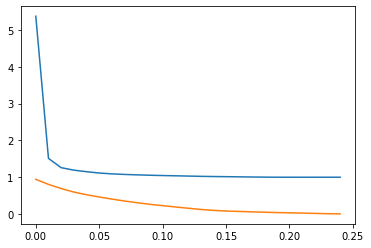

In [120]:
import matplotlib.pyplot as plt
plt.plot(lasso_set['rmse'])
plt.plot(lasso_set['r2'])

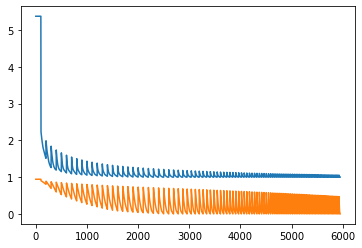

In [79]:
plt.plot(ela[['rmse','r2']])

In [90]:
train=pd.read_csv('./train (2).csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [91]:
train=train[['Survived','Pclass','Sex','SibSp','Parch','Embarked']]
train

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S
...,...,...,...,...,...,...
886,0,2,male,0,0,S
887,1,1,female,0,0,S
888,0,3,female,1,2,S
889,1,1,male,0,0,C


In [92]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [93]:
train=train.dropna()
train

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S
...,...,...,...,...,...,...
886,0,2,male,0,0,S
887,1,1,female,0,0,S
888,0,3,female,1,2,S
889,1,1,male,0,0,C


In [94]:
train=train.reset_index()
train=train.drop(['index'],axis=1)
train

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S
...,...,...,...,...,...,...
884,0,2,male,0,0,S
885,1,1,female,0,0,S
886,0,3,female,1,2,S
887,1,1,male,0,0,C


In [95]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
category=encoder.fit_transform(train[['Sex','Embarked']])
category=pd.DataFrame(category)
category.columns=['Sex','Embarked']
category

,Sex,Embarked
0,1.0,2.0
1,0.0,0.0
2,0.0,2.0
3,0.0,2.0
4,1.0,2.0
...,...,...
884,1.0,2.0
885,0.0,2.0
886,0.0,2.0
887,1.0,0.0


In [96]:
train['Sex']=category['Sex']
train['Embarked']=category['Embarked']
train

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,1.0,1,0,2.0
1,1,1,0.0,1,0,0.0
2,1,3,0.0,0,0,2.0
3,1,1,0.0,1,0,2.0
4,0,3,1.0,0,0,2.0
...,...,...,...,...,...,...
884,0,2,1.0,0,0,2.0
885,1,1,0.0,0,0,2.0
886,0,3,0.0,1,2,2.0
887,1,1,1.0,0,0,0.0


In [97]:
chi_data=pd.crosstab(index=train.Pclass, columns=train.Survived,values=train.Survived, aggfunc=pd.value_counts )
chi_data

Survived,0,1
Pclass,,
1,80,134
2,97,87
3,372,119


In [114]:
from scipy.stats import chi2_contingency
chi_data=pd.crosstab(index=train.Pclass, columns=train.Survived,values=train.Survived, aggfunc=pd.value_counts )
chi, p, dof, expected = chi2_contingency(chi_data)
if p <0.05:
  print('Survived and Pclass')
  print()
  print(f"chi 스퀘어 값: {chi}",
      f"p-value (0.05): {p}",
      f"자유도 수: {dof}",
      f"기대값: \n{pd.DataFrame(expected)}",
      f"측정값: \n{chi_data}", sep = "\n" )
  print('p-value가 0.05 이하 이므로, 귀무가설을 기각한다. 즉, 생존과 Pclass는 관계가 있다.')


Survived and Pclass

chi 스퀘어 값: 100.98040726128336
p-value (0.05): 1.1813624785477922e-22
자유도 수: 2
기대값: 
            0           1
0  132.155231   81.844769
1  113.628796   70.371204
2  303.215973  187.784027
측정값: 
Survived    0    1
Pclass            
1          80  134
2          97   87
3         372  119
p-value가 0.05 이하 이므로, 귀무가설을 기각한다. 즉, 생존과 Pclass는 관계가 있다.


In [119]:
chi_data=pd.crosstab(index=train.Sex, columns=train.Survived,values=train.Survived, aggfunc=pd.value_counts )
chi, p, dof, expected = chi2_contingency(chi_data)
if p <0.05:
  print('Survived and Sex')
  print()
  print(f"chi 스퀘어 값: {chi}",
      f"p-value (0.05): {p}",
      f"자유도 수: {dof}",
      f"기대값: \n{pd.DataFrame(expected)}",
      f"측정값: \n{chi_data}", sep = "\n" )
  print('p-value가 0.05 이하 이므로, 귀무가설을 기각한다. 즉, 생존과 성별은 관계가 있다.')


Survived and Sex

chi 스퀘어 값: 258.4266104463763
p-value (0.05): 3.7799096665576e-58
자유도 수: 1
기대값: 
            0           1
0  192.674916  119.325084
1  356.325084  220.674916
측정값: 
Survived    0    1
Sex               
0.0        81  231
1.0       468  109
p-value가 0.05 이하 이므로, 귀무가설을 기각한다. 즉, 생존과 성별은 관계가 있다.


In [118]:
chi_data=pd.crosstab(index=train.SibSp, columns=train.Survived,values=train.Survived, aggfunc=pd.value_counts)
chi_data=chi_data.fillna(0)
chi, p, dof, expected = chi2_contingency(chi_data)
if p <0.05:
  print('Survived and SibSp')
  print()
  print(f"chi 스퀘어 값: {chi}",
      f"p-value (0.05): {p}",
      f"자유도 수: {dof}",
      f"기대값: \n{pd.DataFrame(expected)}",
      f"측정값: \n{chi_data}", sep = "\n" )
  print('p-value가 0.05 이하 이므로, 귀무가설을 기각한다. 즉, 생존과 남매,형제관계는 관계가 있다.')


Survived and SibSp

chi 스퀘어 값: 37.74134847570515
p-value (0.05): 1.2620136275676984e-06
자유도 수: 6
기대값: 
            0           1
0  374.233971  231.766029
1  129.067492   79.932508
2   17.291339   10.708661
3    9.880765    6.119235
4   11.115861    6.884139
5    3.087739    1.912261
6    4.322835    2.677165
측정값: 
Survived      0      1
SibSp                 
0         398.0  208.0
1          97.0  112.0
2          15.0   13.0
3          12.0    4.0
4          15.0    3.0
5           5.0    0.0
8           7.0    0.0
p-value가 0.05 이하 이므로, 귀무가설을 기각한다. 즉, 생존과 남매,형제관계는 관계가 있다.


In [117]:
chi_data=pd.crosstab(index=train.Parch, columns=train.Survived,values=train.Survived, aggfunc=pd.value_counts)
chi_data=chi_data.fillna(0)
chi, p, dof, expected = chi2_contingency(chi_data)
if p <0.05:
  print('Survived and Parch')
  print()
  print(f"chi 스퀘어 값: {chi}",
      f"p-value (0.05): {p}",
      f"자유도 수: {dof}",
      f"기대값: \n{pd.DataFrame(expected)}",
      f"측정값: \n{chi_data}", sep = "\n" )
  print('p-value가 0.05 이하 이므로, 귀무가설을 기각한다. 즉, 생존과 부모,자식관계는 관계가 있다.')


Survived and Parch

chi 스퀘어 값: 28.400618683311578
p-value (0.05): 7.896496976051095e-05
자유도 수: 6
기대값: 
            0           1
0  417.462317  258.537683
1   72.870641   45.129359
2   49.403825   30.596175
3    3.087739    1.912261
4    2.470191    1.529809
5    3.087739    1.912261
6    0.617548    0.382452
측정값: 
Survived      0      1
Parch                 
0         445.0  231.0
1          53.0   65.0
2          40.0   40.0
3           2.0    3.0
4           4.0    0.0
5           4.0    1.0
6           1.0    0.0
p-value가 0.05 이하 이므로, 귀무가설을 기각한다. 즉, 생존과 부모,자식관계는 관계가 있다.


In [116]:
chi_data=pd.crosstab(index=train.Embarked, columns=train.Survived,values=train.Survived, aggfunc=pd.value_counts)
chi_data=chi_data.fillna(0)
chi, p, dof, expected = chi2_contingency(chi_data)
if p <0.05:
  print('Survived and Embarked')
  print()
  print(f"chi 스퀘어 값: {chi}",
      f"p-value (0.05): {p}",
      f"자유도 수: {dof}",
      f"기대값: \n{pd.DataFrame(expected)}",
      f"측정값: \n{chi_data}", sep = "\n" )
  print('p-value가 0.05 이하 이므로, 귀무가설을 기각한다. 즉, 생존과 승선장소간의 관계가 있다.')


Survived and Embarked

chi 스퀘어 값: 26.48914983923762
p-value (0.05): 1.769922284120912e-06
자유도 수: 2
기대값: 
            0           1
0  103.748031   64.251969
1   47.551181   29.448819
2  397.700787  246.299213
측정값: 
Survived    0    1
Embarked          
0.0        75   93
1.0        47   30
2.0       427  217
p-value가 0.05 이하 이므로, 귀무가설을 기각한다. 즉, 생존과 승선장소간의 관계가 있다.
